<a href="https://colab.research.google.com/github/daradanci/MMO_2025/blob/main/notes/RK1_MMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Зелинский Даниил Михайлович, ИУ5-25М
## 1 вариант

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = "music_genre.csv"
data = pd.read_csv(file_path)

In [4]:
# --- ЗАДАЧА №1 ---
# Count (frequency) encoding для категориального признака 'music_genre'
count_encoding = data['music_genre'].value_counts().to_dict()
data['music_genre_count_encoded'] = data['music_genre'].map(count_encoding)

In [5]:
print("Пример после Count Encoding:")
print(data[['music_genre', 'music_genre_count_encoded']].head())


Пример после Count Encoding:
  music_genre  music_genre_count_encoded
0  Electronic                     5000.0
1  Electronic                     5000.0
2  Electronic                     5000.0
3  Electronic                     5000.0
4  Electronic                     5000.0


In [6]:
# --- ЗАДАЧА №21 ---
# Масштабирование по медиане для числового признака 'popularity'
median_value = data['popularity'].median()
data['popularity_scaled_median'] = data['popularity'] / median_value

In [7]:
print("\nМедианное значение popularity:", median_value)
print(data[['popularity', 'popularity_scaled_median']].head())


Медианное значение popularity: 45.0
   popularity  popularity_scaled_median
0        27.0                  0.600000
1        31.0                  0.688889
2        28.0                  0.622222
3        34.0                  0.755556
4        32.0                  0.711111


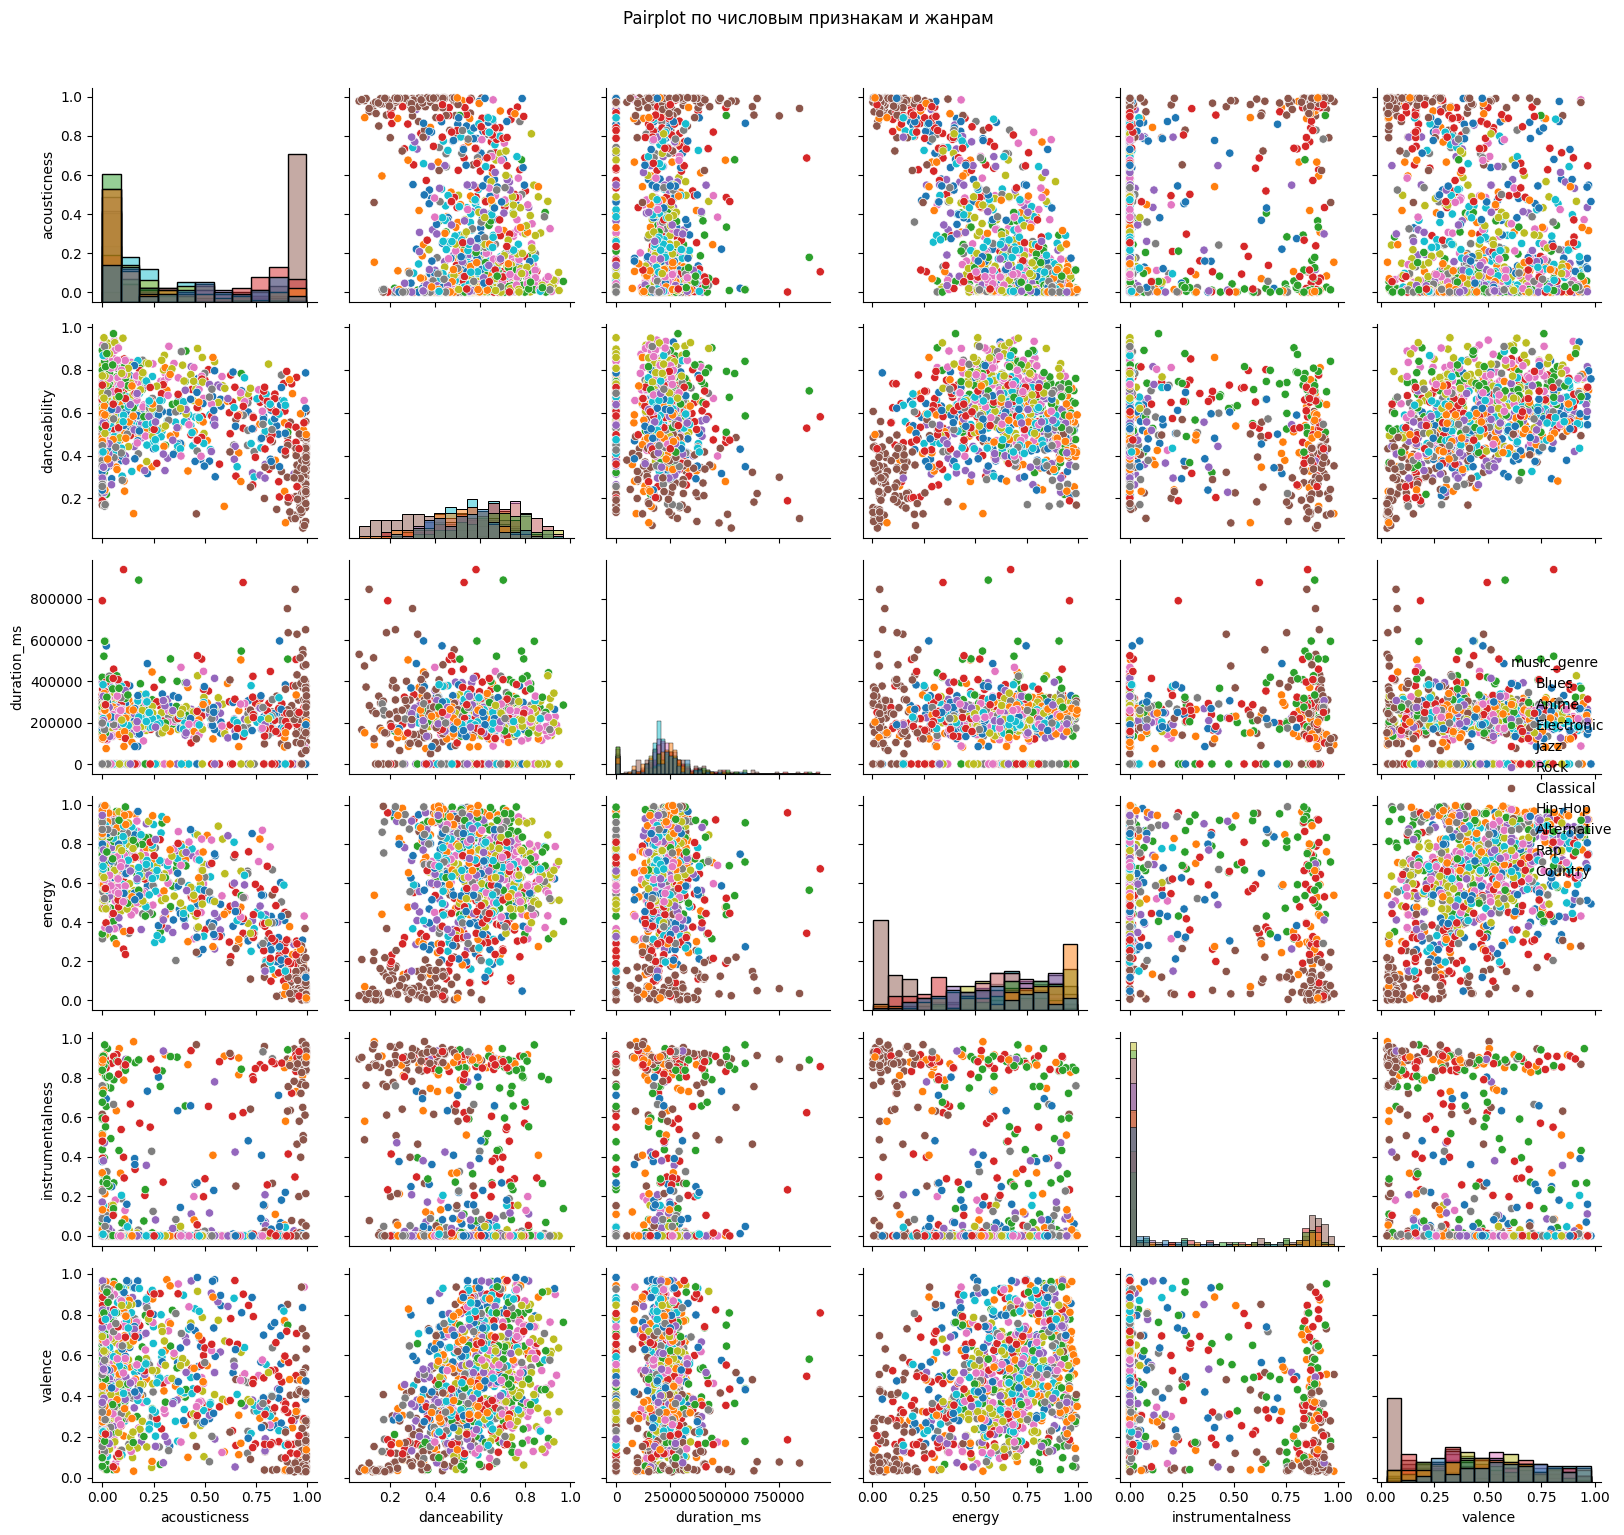

In [8]:
# ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ
# Построение pairplot по числовым признакам с hue='music_genre'
numeric_cols = [
    'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'valence'
]
# Приведение колонок к числовому типу и удаление некорректных значений
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

pairplot_data = data[numeric_cols + ['music_genre']].replace([np.inf, -np.inf], np.nan).dropna()

# Сэмплирование 1000 строк для визуализации
sampled = pairplot_data.sample(n=1000, random_state=42)

# Построение pairplot
sns.pairplot(sampled, hue='music_genre', diag_kind='hist')
plt.suptitle("Pairplot по числовым признакам и жанрам", y=1.02)
plt.tight_layout()
plt.show()


# Вывод
## 1. Count Encoding успешно выполнен для категориального признака 'music_genre'.
## 2. Масштабирование по медиане выполнено для числового признака 'popularity'.
## 3. Построен pairplot, показывающий взаимосвязи между числовыми признаками с учетом музыкального жанра.
